In [1]:
import os
import numpy as np
import pandas as pd
from pprint import pprint
import scipy.io as sio
import seaborn as sns
import mne
from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Reading in gdf data
- updated set eog param in addition to preload
- set var names of raw to path names to speed up function usage later on

In [98]:
raw1 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A01T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw1.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw2 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A02T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw2.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw3 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A03T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw3.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw4 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A04T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw4.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw5 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A05T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw5.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw6 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A06T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw6.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw7 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A07T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw7.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw8 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A08T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw8.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw9 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A09T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw9.drop_channels(['EOG-left','EOG-central','EOG-right'])


# raw.append(raw2)
# raw.append(raw3)
# raw.append(raw4)
# raw.append(raw5)
# raw.append(raw6)
# raw.append(raw7)
# raw.append(raw8)
# raw.append(raw9)

Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/g2hong/cogs189wi23/COGS189Project/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A09T.gdf, 22 x 673328 (2693.3 s), ~113.0 MB, data loaded>

## Added three functions 

    1. read_data(input raw): returns features and label data
    2. plot_data_events(input raw): returns plot of events along time fs
    3. plot_data_evoked(input raw): returns plot of evoked averages epochs for each subject and four classes

In [99]:
def read_data(raw):
    raw.set_eeg_reference()
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7, on_missing='warn')
    features=epoch.get_data()
    labels=epoch.events[:,-1]
    
    return features, labels

In [100]:
def plot_data_events(raw):
    raw.set_eeg_reference()
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7, on_missing='warn')
    features=epoch.get_data()
    labels=epoch.events[:,-1]
    
    event_dict={
    'reject':1,
    'eye move':2,
    'eye open':3,
    'eye close':4,
    'new run':5,
    'new trial':6,
    'class 1':7, 'class 2':8, 'class 3':9,'class 4':10
}
    
    fig=mne.viz.plot_events(events[0],event_id=event_dict,
                        sfreq=raw.info['sfreq'],
                        first_samp=raw.first_samp)

In [101]:
def plot_data_evoked(raw):
    raw.set_eeg_reference()
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7, on_missing='warn')
    features=epoch.get_data()
    labels=epoch.events[:,-1]
    
    evoked_1=epoch['7'].average()
    evoked_2=epoch['8'].average()
    evoked_3=epoch['9'].average()
    evoked_4=epoch['10'].average()
    dicts={'left':evoked_1,'right':evoked_2,'foot':evoked_3,'tongue':evoked_4}
    
    fig=mne.viz.plot_compare_evokeds(dicts)
    
    return fig

## Use plot events function for all 9 subjects

In [102]:
feature1, label1 = read_data(raw1)
feature2, label2 = read_data(raw2)
feature3, label3 = read_data(raw3)
feature5, label5 = read_data(raw5)
feature6, label6 = read_data(raw6)
feature7, label7 = read_data(raw7)
feature8, label8 = read_data(raw8)
feature9, label9 = read_data(raw9)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referenci

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


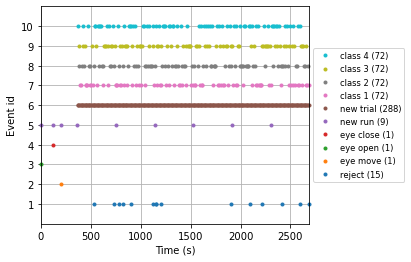

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


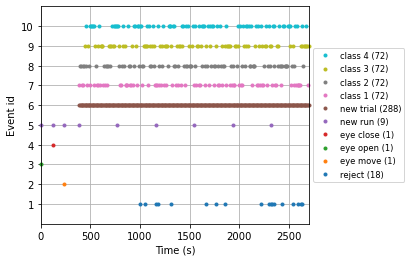

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


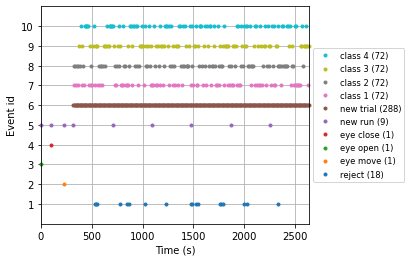

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


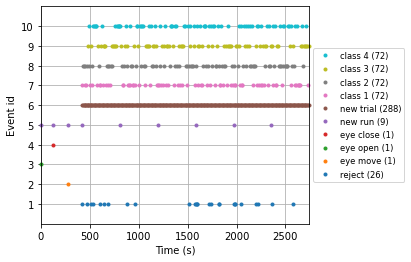

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


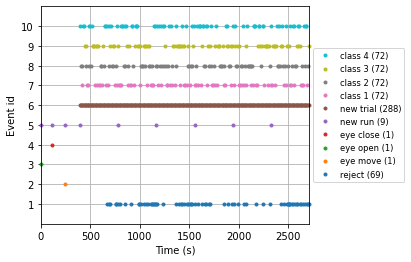

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


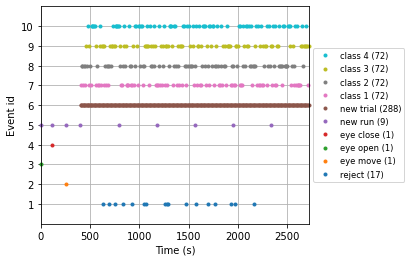

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


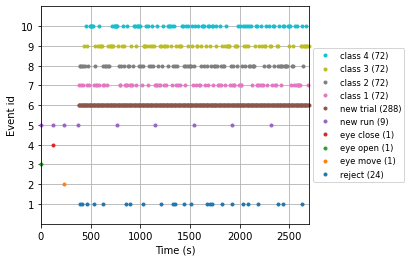

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


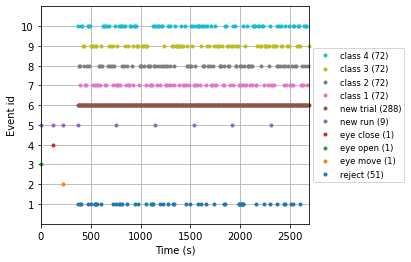

In [103]:
plot_data_events(raw1)
plot_data_events(raw2)
plot_data_events(raw3)
plot_data_events(raw5)
plot_data_events(raw6)
plot_data_events(raw7)
plot_data_events(raw8)
plot_data_events(raw9)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


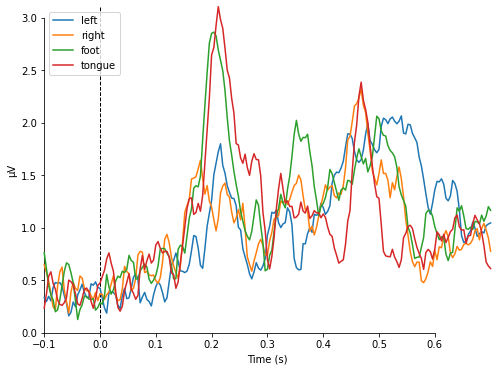

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


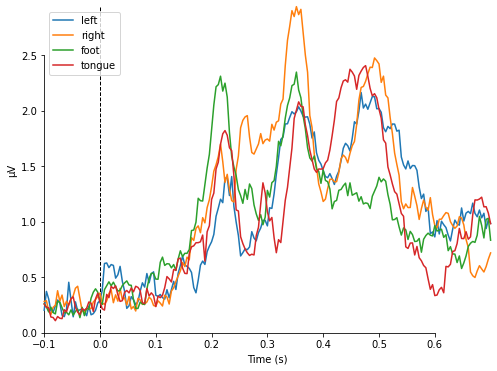

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


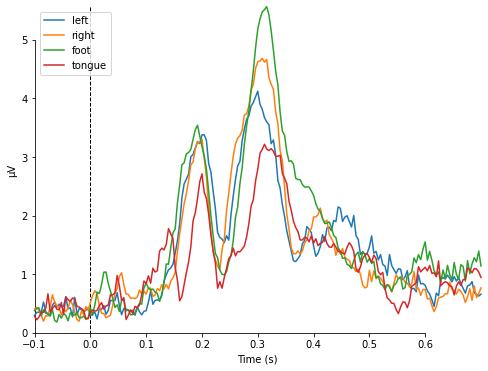

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


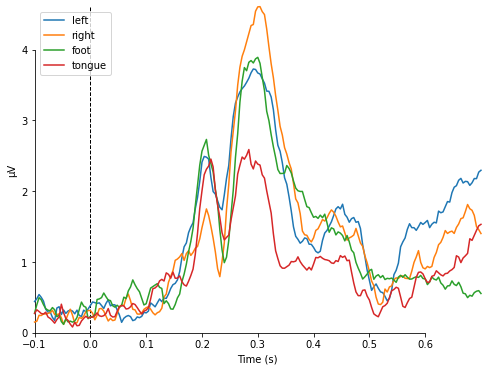

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


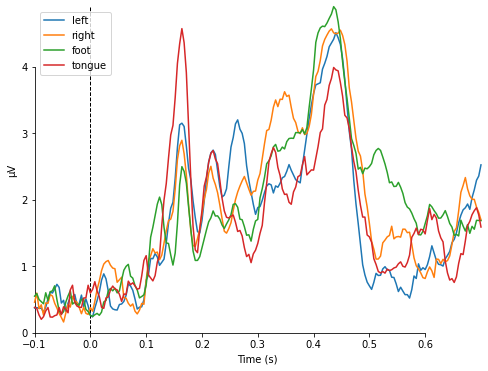

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


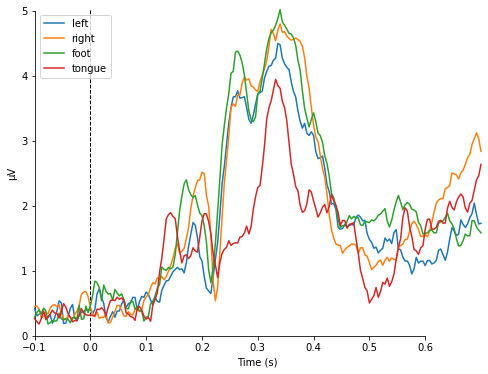

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


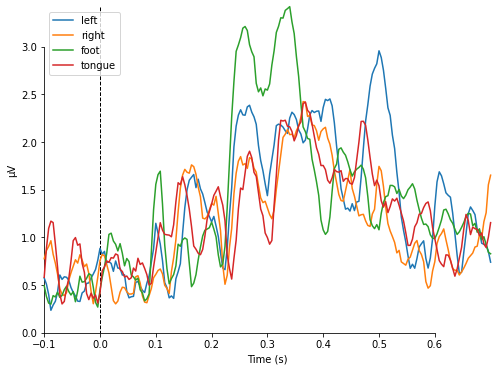

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


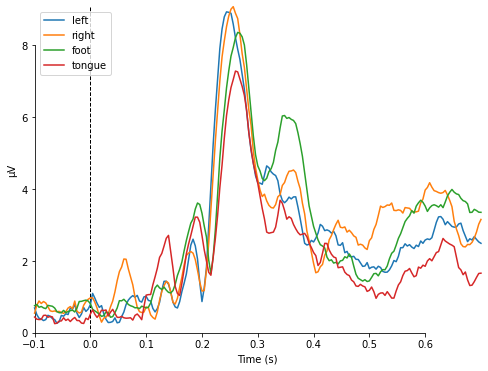

[<Figure size 576x432 with 1 Axes>]

In [104]:
plot_data_evoked(raw1)
plot_data_evoked(raw2)
plot_data_evoked(raw3)
plot_data_evoked(raw5)
plot_data_evoked(raw6)
plot_data_evoked(raw7)
plot_data_evoked(raw8)
plot_data_evoked(raw9)